## Testing effects of soil and fire properties on soil microbial communities

In [2]:
library(phyloseq)
library(vegan)
library(plyr)
library(dplyr)
library(ggplot2)

Warning message:
“package ‘vegan’ was built under R version 3.3.2”Loading required package: permute
Loading required package: lattice
This is vegan 2.4-2

Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘ggplot2’ was built under R version 3.3.2”

In [12]:
# Importing the dataset
ps = import_biom("../../data/Seq_data/QIIME_maxee2/OTU_table/feature-table-metaD-tax2.biom",parseFunction=parse_taxonomy_greengenes, "../../data/Seq_data/QIIME_maxee2/OTU_table/Trees3/fulltree2.rooted.tre")

Warning message in strsplit(msg, "\n"):
“input string 1 is invalid in this locale”

In [13]:
# Importing the dataset
df = read.csv("../../data/Soil_properties/WBNPNWT_Soils_2015_Metadata_File_QIIME.txt",sep="\t",header=TRUE, row.names=1)
# Import the file
Factors = colnames(df)
FactorClass = c("txt","txt","txt","txt","txt","txt","txt","txt","txt","txt","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","num","txt","txt","txt","num","txt","txt","num","num","txt","txt","txt","txt","txt","num","num","num","num","num","num","num","num","num","num","num","num","txt","num","num","num","num","num","num","num","num","num","num")
FactorSet = c("seq","sample","sample","sample","sample","sample","sample","seq","seq","seq","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","soil","class","class","class","class","class","class","class","class","class","class","class","class","sample","severity","severity","severity","severity","severity","severity","severity","severity","severity","severity","severity","severity","severity","codes","codes","codes","codes","codes","codes","codes","codes","codes","codes")
FactorTable = data.frame(Factors=Factors,Class=FactorClass,Set=FactorSet)
# Creating a dataframe with all the factors and whether or not they should be numeric
# And what set of data they belong to
### Selecting only numeric properties
for (i in colnames(sample_data(ps))) {
        if(FactorTable$Class[FactorTable$Factors==i]=="num"){
            sample_data(ps)[,i] = as.numeric(data.frame(sample_data(ps)[,i])[,1])
        }
    }
# Converting numbers to actual numbers

Factors,Class,Set
Barcodes,txt,seq
Sample_Name,txt,sample
Project_ID,txt,sample
Sample_ID,txt,sample
Site_ID,txt,sample
Replicate,txt,sample


Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning me

In [54]:
sample_data(ps)$TotalSeqs=sample_sums(ps)

In [55]:
# Pulling out samples from this project only
ps.wb = prune_samples(sample_data(ps)$Project_ID=="WB15", ps)
ps.wb = prune_samples(sample_data(ps.wb)$Org_or_Min %in% c("O","M"), ps.wb)
# Merging lab replicates for analysis
ps.merged = merge_samples(ps.wb, "Sample_ID")

# This sums the OTUs for each sample ID, and averages the sample data
# That's an issue for the non-numeric sample data, so we have to add it back in.
# The code below is probably inefficient, but it works correctly.
names=colnames(sample_data(ps.wb))
notcommonnames = c('Sample_Name','Replicate','Project_ID','Fwd_Primer_Barcode','Rev_Primer_Barcode','Revcomp_Rev_Primer_Barcode')
commonnames = names[(names %in% notcommonnames)]
common_sample_data = sample_data(ps.wb)[ , -which(names(sample_data(ps.wb)) %in% commonnames)]
commonrownames=row.names(sample_data(ps.merged))
common_sample_data2 = common_sample_data[which(common_sample_data$Sample_ID %in% commonrownames),]
common_sample_data2 = common_sample_data2[!duplicated(common_sample_data2$Sample_ID), ]
row.names(common_sample_data2) = common_sample_data2$Sample_ID
sample_data(ps.merged)=common_sample_data2

ps.merged.norm = transform_sample_counts(ps.merged, function(x) x / sum(x) )

minseqs = 3000
ps.merged.norm.min = prune_samples(sample_data(ps.merged.norm)$TotalSeqs>minseqs,ps.merged.norm)

Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMeth

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Groups,1,0.006869309,0.006869309,4.268771,0.04172582
Residuals,89,0.143218842,0.001609200,NA,NA


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
          diff          lwr        upr     p adj
O-M 0.01761763 0.0006746714 0.03456059 0.0417258


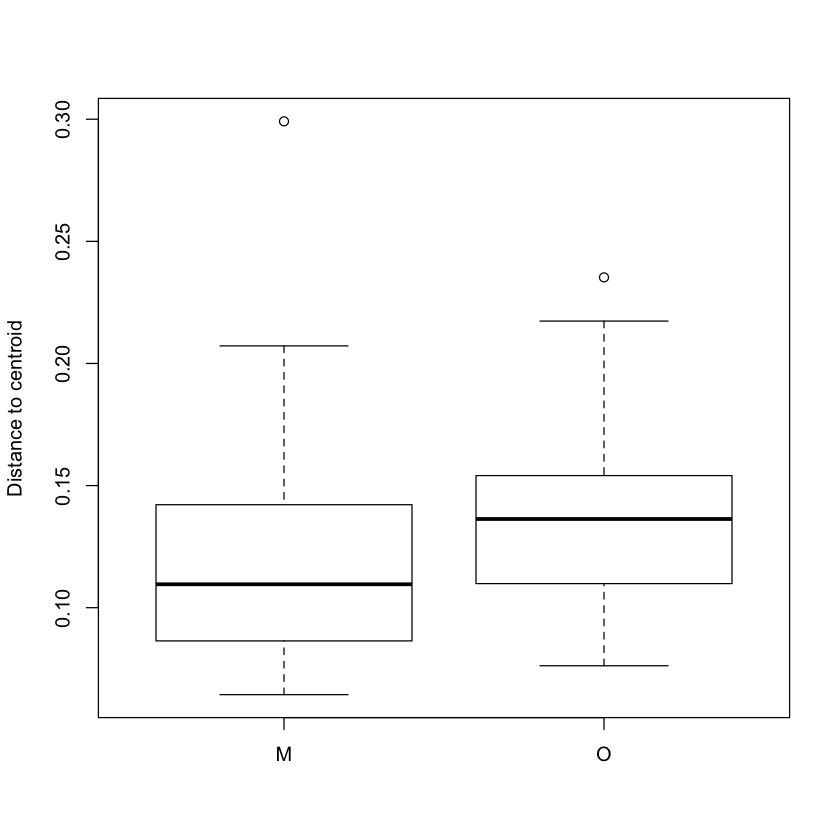

In [57]:
physeq = ps.merged.norm.min
df = as(sample_data(physeq), "data.frame")
d = distance(physeq, method = "unifrac", weighted=TRUE)
sampdat = sample_data(physeq)
groups = as.factor(sampdat$Org_or_Min)
x = betadisper(d, groups)
boxplot(x, ylab = "Distance to centroid")
anova(x)
TukeyHSD(x, ordered = FALSE, conf.level = 0.95)
# Performing test of beta dispersion - the permanova/adonis test requires that groups have similar dispersion.
# This doesn't look outrageously bad here for the different vegetation communities - no significant differences.
# Looks generally okay for Severity_Class
# Land_Class has an issue - classes have significantly diff betadispersion
# Mineral / Organic also have diff betadispersion

In [121]:
colnames(sample_data(ps.merged.norm.min))

[1] "Al_mg_kg"            "Barcodes"            "Burn_Severity_Index"
 [4] "Burned_Unburned"     "CBI"                 "CEC_cmol_kg"        
 [7] "CFSI"                "Ca_mg_kg"            "Clay_pct"           
[10] "Community"           "Cu_mg_kg"            "Dead_Trees"         
[13] "EC_mS_cm"            "Ecosite"             "Exch_Ca_mg_kg"      
[16] "Exch_K_mg_kg"        "Exch_Mg_mg_kg"       "Exch_Na_mg_kg"      
[19] "Fe_mg_kg"            "Fire_ID"             "Forest"             
[22] "Interval"            "K_mg_kg"             "Land_Class"         
[25] "Land_Class_Unburned" "Live_Trees"          "Mean_Duff_Depth_cm" 
[28] "Mg_mg_kg"            "Mn_mg_kg"            "Mo_mg_kg"           
[31] "Moisture"            "Moisture_Regime"     "Na_mg_kg"           
[34] "Nutrient"            "O_Depth_cm"          "Org_or_Min"         
[37] "Overstory_CBI"       "P_mg_kg"             "Pct_Exposed_Mineral"
[40] "Plains"              "RBR"                 "S_mg_kg"            
[43] "Sample_ID"           "Sand_pct"            "Severity_Class"     
[46] "Silt_pct"            "Site_ID"             "TC_pct"             
[49] "TIC_ash_pct"         "TOC_HCL_cruc_pct"    "TOC_LOI_pct"        
[52] "Total_N_pct"         "Total_S_pct"         "Understory_CBI"     
[55] "Veg_Comm"            "Zn_mg_kg"            "bui"                
[58] "dc"                  "dmc"                 "ffmc"               
[61] "fwi"                 "isi"                 "nTrees"             
[64] "pH"                  "prec"                "rh"                 
[67] "temp"                "ws"                  "TotalSeqs"

In [173]:
AdonisFunction = function(physeq=ps.merged.norm.min, method="unifrac", Org_or_Min=c("O","M"), Land_Class=c("Upland","Wetland")){
    physeq = prune_samples(sample_data(physeq)$Burned_Unburned == "Burned", physeq)
    physeq = prune_samples(sample_data(physeq)$Org_or_Min %in% Org_or_Min, physeq)
    physeq = prune_samples(sample_data(physeq)$Land_Class %in% Land_Class, physeq)
    physeq = prune_samples(!is.na(sample_data(physeq)$pH), physeq)
        physeq = prune_samples(!is.na(sample_data(physeq)$CFSI), physeq)
    d = distance(physeq, method = method, weighted=TRUE)  
    d.adonis = adonis(d ~ 
                      + sample_data(physeq)$Veg_Comm  
                      #+ sample_data(physeq)$Org_or_Min 
                      #+ sample_data(physeq)$Land_Class
                      #+ sample_data(physeq)$Sand_pct 
                      #+ sample_data(physeq)$pH
                      #+ sample_data(physeq)$Total_S_pct
                      #+ sample_data(physeq)$Al_mg_kg
                      #+ sample_data(physeq)$Exch_Ca_mg_kg
                      #+ sample_data(physeq)$Fire_ID
                      #+ sample_data(physeq)$CFSI
                      #+ sample_data(physeq)$CEC_cmol_kg
                      #+ sample_data(physeq)$TOC_LOI_pct
                      #+ sample_data(physeq)$ffmc
                      #+ sample_data(physeq)$Pct_Exposed_Mineral
                      #+ sample_data(physeq)$P_mg_kg
                      #+ sample_data(physeq)$Total_N_pct
                      + sample_data(physeq)$CBI
                      #+ sample_data(physeq)$RBR
                      #+ sample_data(physeq)$Burn_Severity_Index
                      , df)
    d.adonis
}
# Try removing unburned sites from these models

In [174]:
AdonisFunction(Org_or_Min="M")


Call:
adonis(formula = d ~ +sample_data(physeq)$Veg_Comm + sample_data(physeq)$CBI,      data = df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                             Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)   
sample_data(physeq)$Veg_Comm  3   0.07251 0.024170  1.6831 0.14645  0.063 . 
sample_data(physeq)$CBI       1   0.04923 0.049231  3.4283 0.09943  0.006 **
Residuals                    26   0.37337 0.014360         0.75412          
Total                        30   0.49511                  1.00000          
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1